# **Лутченкова Екатерина**

## Ник на kaggle: Ekaterina Lutchenkova

Задача: предсказать отток пользователей. Результат оценить по Roc Auc.

In [1]:
from sklearn.metrics import roc_auc_score

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

1) Посмотрим на случайные строчки. 

2) Посмотрим, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и заменим их.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
test = pd.read_csv('./test.csv')

In [ ]:
data.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
# Посмотрим на случайные строчки
data.sample(n=5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
727,64,47.85,3147.5,Female,0,Yes,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Electronic check,1
2546,27,20.25,538.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
3023,71,24.65,1766.75,Male,1,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0
3928,2,20.20,34.75,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1657,5,83.60,404.2,Female,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,1


In [ ]:
# Списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = ['Churn']

Посмотрим информацию о данных. Кажется, что пропусков нет. Видно, что столбец TotalSpent имеет числовые значения, но помечен как object, переведем его в float (также и в тестовом датасете).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
ClientPeriod                5282 non-null int64
MonthlySpending             5282 non-null float64
TotalSpent                  5282 non-null object
Sex                         5282 non-null object
IsSeniorCitizen             5282 non-null int64
HasPartner                  5282 non-null object
HasChild                    5282 non-null object
HasPhoneService             5282 non-null object
HasMultiplePhoneNumbers     5282 non-null object
HasInternetService          5282 non-null object
HasOnlineSecurityService    5282 non-null object
HasOnlineBackup             5282 non-null object
HasDeviceProtection         5282 non-null object
HasTechSupportAccess        5282 non-null object
HasOnlineTV                 5282 non-null object
HasMovieSubscription        5282 non-null object
HasContractPhone            5282 non-null object
IsBillingPaperless          5282 non-null object
PaymentMetho

In [ ]:
for df in [data, test]:
    df.TotalSpent = pd.to_numeric(df.TotalSpent, errors='coerce')

Количество пропусков в данных:

In [ ]:
data.isna().mean()*data.isna().count()

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  9.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

Столбец TotalSpent имеет 9 пропущенных значений.

Подумаем, на что можно заменить наны. Я так полагаю, что TotalSpent - сумма, которая потрачена за весь период времени, поэтому заполним пропуски произведнием времени(Period) и месячной траты.

In [ ]:
for df in [data, test]:
    df.TotalSpent = df.TotalSpent.fillna(df.ClientPeriod*data.MonthlySpending)

Все, таблица заполнена, пропусков нет.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
ClientPeriod                5282 non-null int64
MonthlySpending             5282 non-null float64
TotalSpent                  5282 non-null float64
Sex                         5282 non-null object
IsSeniorCitizen             5282 non-null int64
HasPartner                  5282 non-null object
HasChild                    5282 non-null object
HasPhoneService             5282 non-null object
HasMultiplePhoneNumbers     5282 non-null object
HasInternetService          5282 non-null object
HasOnlineSecurityService    5282 non-null object
HasOnlineBackup             5282 non-null object
HasDeviceProtection         5282 non-null object
HasTechSupportAccess        5282 non-null object
HasOnlineTV                 5282 non-null object
HasMovieSubscription        5282 non-null object
HasContractPhone            5282 non-null object
IsBillingPaperless          5282 non-null object
PaymentMeth

Для категориальных признаков имеются следующие уникальные значения:

In [ ]:
for element in cat_cols:
  print(f"Название колонки - {element}"'\n', data[element].unique(), '\n')

Название колонки - Sex
 ['Male' 'Female'] 

Название колонки - IsSeniorCitizen
 [0 1] 

Название колонки - HasPartner
 ['Yes' 'No'] 

Название колонки - HasChild
 ['Yes' 'No'] 

Название колонки - HasPhoneService
 ['Yes' 'No'] 

Название колонки - HasMultiplePhoneNumbers
 ['No' 'Yes' 'No phone service'] 

Название колонки - HasInternetService
 ['No' 'Fiber optic' 'DSL'] 

Название колонки - HasOnlineSecurityService
 ['No internet service' 'No' 'Yes'] 

Название колонки - HasOnlineBackup
 ['No internet service' 'No' 'Yes'] 

Название колонки - HasDeviceProtection
 ['No internet service' 'No' 'Yes'] 

Название колонки - HasTechSupportAccess
 ['No internet service' 'Yes' 'No'] 

Название колонки - HasOnlineTV
 ['No internet service' 'No' 'Yes'] 

Название колонки - HasMovieSubscription
 ['No internet service' 'No' 'Yes'] 

Название колонки - HasContractPhone
 ['One year' 'Two year' 'Month-to-month'] 

Название колонки - IsBillingPaperless
 ['No' 'Yes'] 

Название колонки - PaymentMethod
 

## Анализ данных

1) Для численных призанков построим гистограмму (*plt.hist(...)*). Для категориальных посчитаем количество каждого значения для каждого признака.

2) Посмотрим на распределение целевой переменной и определим, являются ли классы несбалансированными.

1. Визуальный анализ

Гистограммы для числовых признаков:

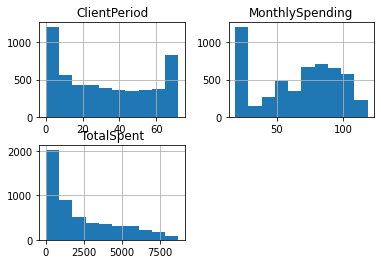

In [ ]:
data.hist(column=num_cols)
None

Для категориальных признаков посчитаем количество каждого значения и построим диаграммы.

In [ ]:
for element in cat_cols:
    print(f"Название колонки - {element}"'\n', data[element].value_counts(), '\n')

Название колонки - Sex
 Male      2655
Female    2627
Name: Sex, dtype: int64 

Название колонки - IsSeniorCitizen
 0    4440
1     842
Name: IsSeniorCitizen, dtype: int64 

Название колонки - HasPartner
 No     2705
Yes    2577
Name: HasPartner, dtype: int64 

Название колонки - HasChild
 No     3676
Yes    1606
Name: HasChild, dtype: int64 

Название колонки - HasPhoneService
 Yes    4761
No      521
Name: HasPhoneService, dtype: int64 

Название колонки - HasMultiplePhoneNumbers
 No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64 

Название колонки - HasInternetService
 Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64 

Название колонки - HasOnlineSecurityService
 No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64 

Название колонки - HasOnlineBackup
 No                     2332
Yes        

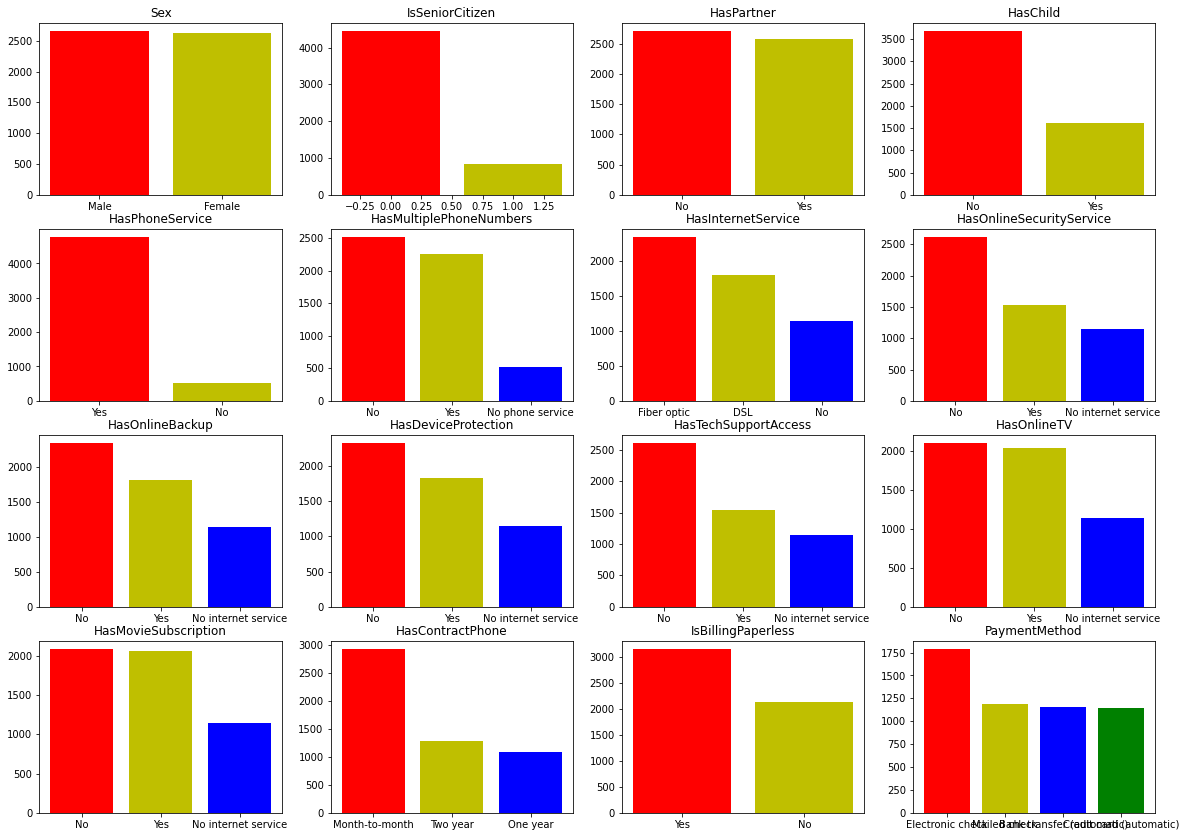

In [ ]:
plt.figure(figsize = (20,60))
for idx,col in enumerate(data[cat_cols]):
    plt.subplot(16,4,idx+1)
    plt.bar(data[col].value_counts().index, data[col].value_counts().values, color = 'rybg')
    #plt.xticks(rotation=45)
    plt.title(col)
None

2. Распределение целевой переменой

In [ ]:
data['Churn'].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

В целевой переменной имеется небольшой дисбаланс классов. Это необходимо учитывать при выборе метрики. В данной задаче качество оценивается по roc_auc, которая подходит для несбалансированных классов.


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Выбросов я особо не заметила, однако можно дополнительно посмотреть на данные и на корреляцию между переменными.

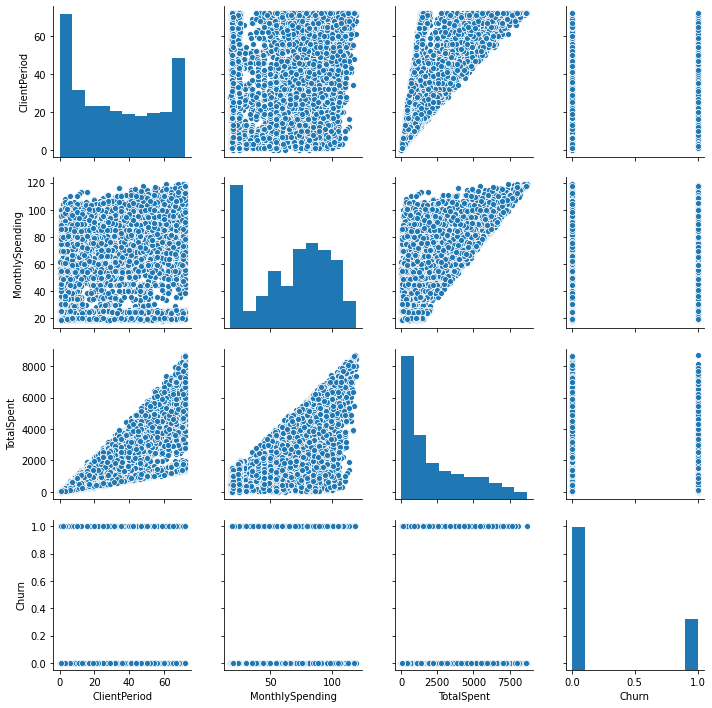

In [ ]:
sns.pairplot(data[num_cols+target_col])

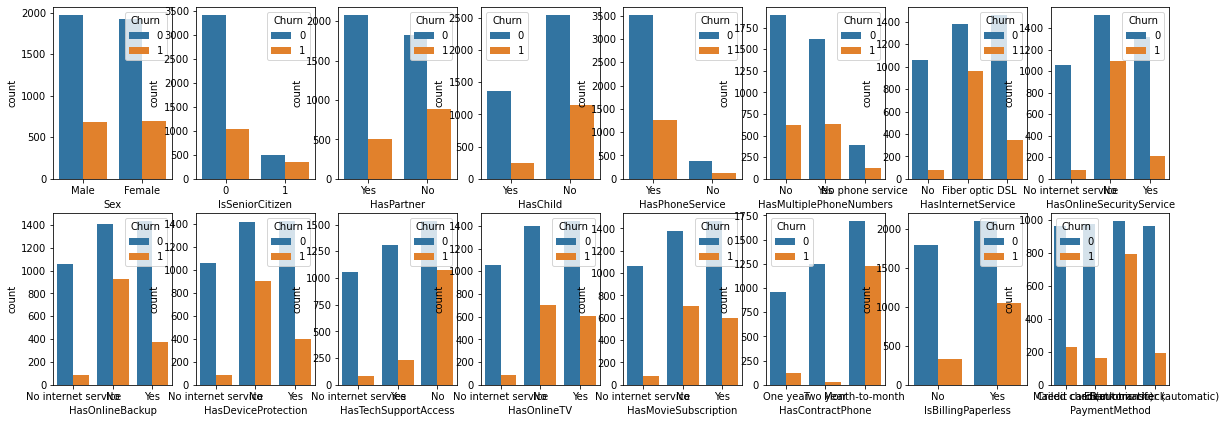

In [ ]:
plt.figure(figsize = (20,60))
for idx,col in enumerate(data[cat_cols]):
    plt.subplot(16,8,idx+1)
    sns.countplot(data[col], hue=data[target_col[0]])

None

Из графиков выше видны некоторые закономерности между целевой переменной и категориальными признаками, например отток больше у тех, у кого есть интернет сервис по оптоволокну (HasInternetService), не имеет службу онлайн безопасности (HasOnlineSecurityService), не имеет доступа к техподдержке и т.д.

Из графика корреляции не видно существенной зависимости с целевой переменной.

<AxesSubplot:>

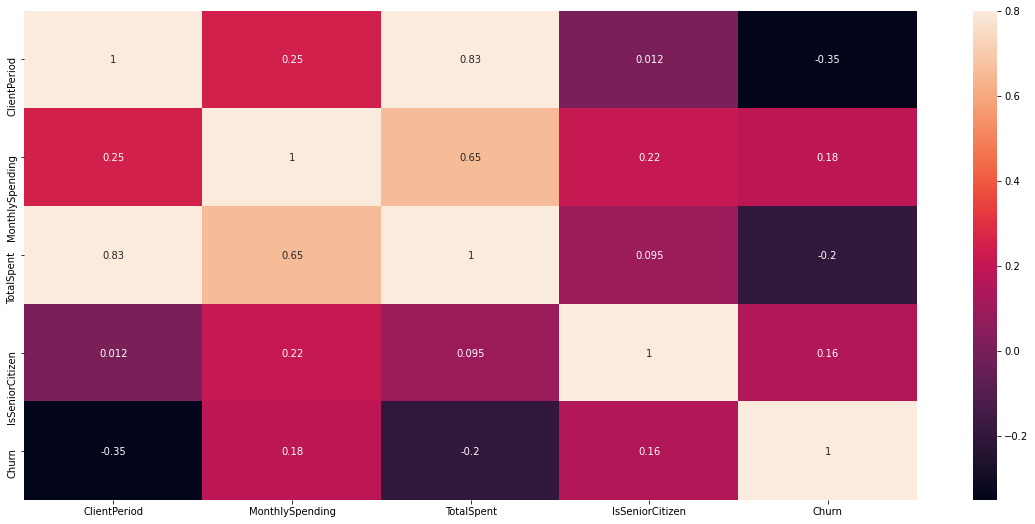

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)

## Применение линейных моделей

1) Обработаем данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) Используем LogisticRegressionCV, он сам при вызове .fit() подберет параметр С.

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [ ]:
X = data[feature_cols]
y = data[target_col]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
print (f"Train shape: X={X_train.shape}, y={y_train.shape}")
print (f"Test shape: X={X_test.shape}, y={y_test.shape}")

Train shape: X=(3538, 19), y=(3538, 1)
Test shape: X=(1744, 19), y=(1744, 1)


Напишем трансформер для того, чтобы в одном пайплайне сделать преобразование категориальных и числовых признаков.

In [ ]:
numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder(sparse=False, handle_unknown='error', drop = 'first')

In [ ]:
transformer = make_column_transformer(
    (numeric_transformer, num_cols),
    (cat_transformer, cat_cols)
)

Объединим предобработку и саму модель в pipeline.

In [ ]:
pipe = make_pipeline(transformer, LogisticRegressionCV(refit=True, scoring='roc_auc'), verbose=10)

In [ ]:
pipe.fit(X_train,y_train)

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.0s
[Pipeline]  (step 2 of 2) Processing logisticregressioncv, total=   0.5s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending',
                                                   'TotalSpent']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                       

In [ ]:
print("ROC AUC train = ",roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]))
y_pred = pipe.predict_proba(X_test)
print("ROC AUC test= ",roc_auc_score(y_test, y_pred[:,1]))

ROC AUC train =  0.8461746151561086
ROC AUC test=  0.8511201902886804


**На Kaggle методом логистической регрессии получился результат ROC AUC = 0.84584**

## Применение градиентного бустинга

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделим выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Используем поиск параметров по сетке, чтобы подобрать лучшие параметры.

In [ ]:
#!pip install catboost
from catboost import CatBoostClassifier, cv

In [ ]:
cat = CatBoostClassifier(eval_metric = 'AUC', random_seed=42)

In [ ]:
cat.fit(X_train, y_train, cat_features = cat_cols, verbose=0, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print("ROC AUC train = ",roc_auc_score(y_train, cat.predict_proba(X_train)[:,1]))
print("ROC AUC test = ",roc_auc_score(y_test, cat.predict_proba(X_test)[:,1]))

ROC AUC train =  0.9039868253017995
ROC AUC test =  0.850499609799391


Лучшее качество на kaggle c дефолтными параметрами - 0.85053

Теперь используем подбор гиперпараметров по сетке.

In [ ]:
cat_grid = CatBoostClassifier(eval_metric = 'AUC', random_seed=42, cat_features = cat_cols)

In [ ]:
param_grid = {
    'learning_rate' : np.arange(0.05, 0.31, 0.05),
    'max_depth': np.arange(5, 16, 1, dtype=int),
    'colsample_bylevel': np.arange(0.3, 0.8, 0.1),
    'n_estimators': [10,50,100,20]
}

In [ ]:
cat_grid.grid_search(param_grid, X_train, y_train, cv=5, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8002438519
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8002439	best: 0.8002439 (0)	total: 120ms	remaining: 2m 37s

bestTest = 0.8022973413
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8022973	best: 0.8022973 (1)	total: 200ms	remaining: 2m 11s

bestTest = 0.8164348264
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8164348	best: 0.8164348 (2)	total: 286ms	remaining: 2m 5s

bestTest = 0.8273982881
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8273983	best: 0.8273983 (3)	total: 382ms	remaining: 2m 5s

bestTest 


bestTest = 0.8285829936
bestIteration = 40

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8285830	best: 0.8368266 (9)	total: 14.5s	remaining: 9m 7s

bestTest = 0.8244118431
bestIteration = 48

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8244118	best: 0.8368266 (9)	total: 15.1s	remaining: 9m 13s

bestTest = 0.8236516571
bestIteration = 20

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8236517	best: 0.8368266 (9)	total: 15.7s	remaining: 9m 19s

bestTest = 0.8279560869
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8279561	best: 0.8368266 (9)	total: 16.9s	remaining: 9m 44s




bestTest = 0.8137050676
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
66:	loss: 0.8137051	best: 0.8368266 (9)	total: 36.4s	remaining: 11m 20s

bestTest = 0.8200975407
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
67:	loss: 0.8200975	best: 0.8368266 (9)	total: 36.6s	remaining: 11m 14s

bestTest = 0.8223237997
bestIteration = 16

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
68:	loss: 0.8223238	best: 0.8368266 (9)	total: 36.9s	remaining: 11m 8s

bestTest = 0.8215191873
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
69:	loss: 0.8215192	best: 0.8368266 (9)	total: 37.1s	remaining: 11m 2


bestTest = 0.8204973788
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
99:	loss: 0.8204974	best: 0.8368266 (9)	total: 53.8s	remaining: 10m 56s

bestTest = 0.8189671343
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
100:	loss: 0.8189671	best: 0.8368266 (9)	total: 54s	remaining: 10m 52s

bestTest = 0.8291802826
bestIteration = 8

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
101:	loss: 0.8291803	best: 0.8368266 (9)	total: 54.2s	remaining: 10m 47s

bestTest = 0.823849108
bestIteration = 32

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
102:	loss: 0.8238491	best: 0.8368266 (9)	total: 55s	remaining: 10m 49s




bestTest = 0.8224225252
bestIteration = 58

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
132:	loss: 0.8224225	best: 0.8368266 (9)	total: 1m 19s	remaining: 11m 51s

bestTest = 0.8255422496
bestIteration = 38

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
133:	loss: 0.8255422	best: 0.8368266 (9)	total: 1m 21s	remaining: 12m

bestTest = 0.8192731832
bestIteration = 17

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
134:	loss: 0.8192732	best: 0.8368266 (9)	total: 1m 23s	remaining: 12m 11s

bestTest = 0.817659022
bestIteration = 23

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
135:	loss: 0.8176590	best: 0.8368266 (9)	total: 1m 25s	remaining: 1


bestTest = 0.8289976405
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
165:	loss: 0.8289976	best: 0.8368266 (9)	total: 1m 54s	remaining: 13m 17s

bestTest = 0.826835553
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
166:	loss: 0.8268356	best: 0.8368266 (9)	total: 1m 55s	remaining: 13m 14s

bestTest = 0.8260358768
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
167:	loss: 0.8260359	best: 0.8368266 (9)	total: 1m 55s	remaining: 13m 11s

bestTest = 0.8040349093
bestIteration = 7

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
168:	loss: 0.8040349	best: 0.8368266 (9)	total: 1m 55s	remaining


bestTest = 0.8212131384
bestIteration = 32

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
198:	loss: 0.8212131	best: 0.8368266 (9)	total: 2m 30s	remaining: 14m 9s

bestTest = 0.821297055
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
199:	loss: 0.8212971	best: 0.8368266 (9)	total: 2m 32s	remaining: 14m 13s

bestTest = 0.8210946678
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
200:	loss: 0.8210947	best: 0.8368266 (9)	total: 2m 34s	remaining: 14m 17s

bestTest = 0.8255422496
bestIteration = 7

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
201:	loss: 0.8255422	best: 0.8368266 (9)	total: 2m 36s	remaining: 


bestTest = 0.8256212299
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
231:	loss: 0.8256212	best: 0.8368266 (9)	total: 4m 6s	remaining: 19m 13s

bestTest = 0.8167951743
bestIteration = 4

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
232:	loss: 0.8167952	best: 0.8368266 (9)	total: 4m 16s	remaining: 19m 55s

bestTest = 0.8195940409
bestIteration = 5

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
233:	loss: 0.8195940	best: 0.8368266 (9)	total: 4m 25s	remaining: 20m 34s

bestTest = 0.813695195
bestIteration = 12

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
234:	loss: 0.8136952	best: 0.8368266 (9)	total: 4m 26s	remaining: 


bestTest = 0.8107038138
bestIteration = 8

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
265:	loss: 0.8107038	best: 0.8368266 (9)	total: 6m 42s	remaining: 26m 32s

bestTest = 0.825423779
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
266:	loss: 0.8254238	best: 0.8368266 (9)	total: 6m 42s	remaining: 26m 25s

bestTest = 0.8283608613
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
267:	loss: 0.8283609	best: 0.8368266 (9)	total: 6m 42s	remaining: 26m 18s

bestTest = 0.8259963866
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
268:	loss: 0.8259964	best: 0.8368266 (9)	total: 6m 42s	remaining: 2


bestTest = 0.82754144
bestIteration = 35

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
298:	loss: 0.8275414	best: 0.8368266 (9)	total: 6m 55s	remaining: 23m 40s

bestTest = 0.8325270755
bestIteration = 30

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
299:	loss: 0.8325271	best: 0.8368266 (9)	total: 6m 56s	remaining: 23m 36s

bestTest = 0.8327788254
bestIteration = 90

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
300:	loss: 0.8327788	best: 0.8368266 (9)	total: 6m 57s	remaining: 23m 33s

bestTest = 0.8316977816
bestIteration = 87

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
301:	loss: 0.8316978	best: 0.8368266 (9)	total: 6m 58s	remaining


bestTest = 0.8259470239
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
331:	loss: 0.8259470	best: 0.8368266 (9)	total: 7m 18s	remaining: 21m 43s

bestTest = 0.8237454463
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
332:	loss: 0.8237454	best: 0.8368266 (9)	total: 7m 18s	remaining: 21m 39s

bestTest = 0.8233949709
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
333:	loss: 0.8233950	best: 0.8368266 (9)	total: 7m 18s	remaining: 21m 34s

bestTest = 0.8219437067
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
334:	loss: 0.8219437	best: 0.8368266 (9)	total: 7m 18s	remaini


bestTest = 0.8199148987
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
364:	loss: 0.8199149	best: 0.8368266 (9)	total: 7m 35s	remaining: 19m 52s

bestTest = 0.8145689153
bestIteration = 4

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
365:	loss: 0.8145689	best: 0.8368266 (9)	total: 7m 35s	remaining: 19m 48s

bestTest = 0.8243871617
bestIteration = 35

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
366:	loss: 0.8243872	best: 0.8368266 (9)	total: 7m 36s	remaining: 19m 46s

bestTest = 0.8242538824
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
367:	loss: 0.8242539	best: 0.8368266 (9)	total: 7m 37s	remaining


bestTest = 0.8233554807
bestIteration = 22

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
397:	loss: 0.8233555	best: 0.8368266 (9)	total: 8m 4s	remaining: 18m 41s

bestTest = 0.8256014848
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
398:	loss: 0.8256015	best: 0.8368266 (9)	total: 8m 6s	remaining: 18m 42s

bestTest = 0.830582184
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
399:	loss: 0.8305822	best: 0.8368266 (9)	total: 8m 8s	remaining: 18m 43s

bestTest = 0.8235825493
bestIteration = 39

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
400:	loss: 0.8235825	best: 0.8368266 (9)	total: 8m 10s	remaining: 18


bestTest = 0.8263814159
bestIteration = 8

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
430:	loss: 0.8263814	best: 0.8368266 (9)	total: 8m 40s	remaining: 17m 53s

bestTest = 0.8198408546
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
431:	loss: 0.8198409	best: 0.8368266 (9)	total: 8m 40s	remaining: 17m 50s

bestTest = 0.8081418882
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
432:	loss: 0.8081419	best: 0.8368266 (9)	total: 8m 40s	remaining: 17m 46s

bestTest = 0.8187647471
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
433:	loss: 0.8187647	best: 0.8368266 (9)	total: 8m 41s	remaining: 


bestTest = 0.8197717467
bestIteration = 12

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
463:	loss: 0.8197717	best: 0.8368266 (9)	total: 9m 22s	remaining: 17m 18s

bestTest = 0.8191004137
bestIteration = 15

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
464:	loss: 0.8191004	best: 0.8368266 (9)	total: 9m 24s	remaining: 17m 18s

bestTest = 0.8237898727
bestIteration = 7

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
465:	loss: 0.8237899	best: 0.8368266 (9)	total: 9m 27s	remaining: 17m 19s

bestTest = 0.8175109338
bestIteration = 7

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
466:	loss: 0.8175109	best: 0.8368266 (9)	total: 9m 30s	remaining


bestTest = 0.8222892458
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
496:	loss: 0.8222892	best: 0.8368266 (9)	total: 11m 23s	remaining: 18m 51s

bestTest = 0.8150378612
bestIteration = 5

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
497:	loss: 0.8150379	best: 0.8368266 (9)	total: 11m 34s	remaining: 19m 7s

bestTest = 0.8170962869
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
498:	loss: 0.8170963	best: 0.8368266 (9)	total: 11m 35s	remaining: 19m 4s

bestTest = 0.8186413403
bestIteration = 17

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
499:	loss: 0.8186413	best: 0.8368266 (9)	total: 11m 36s	remaini

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
529:	loss: 0.8190757	best: 0.8368266 (9)	total: 14m 21s	remaining: 21m 23s

bestTest = 0.8176985122
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
530:	loss: 0.8176985	best: 0.8368266 (9)	total: 14m 21s	remaining: 21m 19s

bestTest = 0.8234838238
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
531:	loss: 0.8234838	best: 0.8368266 (9)	total: 14m 21s	remaining: 21m 15s

bestTest = 0.8250387497
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
532:	loss: 0.8250387	best: 0.8368266 (9)	total: 14m 21s	remaining: 21m 12s

bestTest = 0.8257150191
bestIte


bestTest = 0.8296245471
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
562:	loss: 0.8296245	best: 0.8368266 (9)	total: 14m 35s	remaining: 19m 37s

bestTest = 0.8286126112
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
563:	loss: 0.8286126	best: 0.8368266 (9)	total: 14m 36s	remaining: 19m 34s

bestTest = 0.8316089287
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
564:	loss: 0.8316089	best: 0.8368266 (9)	total: 14m 37s	remaining: 19m 32s

bestTest = 0.8310560662
bestIteration = 86

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
565:	loss: 0.8310561	best: 0.8368266 (9)	total: 14m 38s	rema


bestTest = 0.8271810921
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
595:	loss: 0.8271811	best: 0.8368266 (9)	total: 14m 58s	remaining: 18m 12s

bestTest = 0.8262826905
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
596:	loss: 0.8262827	best: 0.8368266 (9)	total: 14m 59s	remaining: 18m 9s

bestTest = 0.8313078161
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
597:	loss: 0.8313078	best: 0.8368266 (9)	total: 14m 59s	remaining: 18m 6s

bestTest = 0.8234245886
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
598:	loss: 0.8234246	best: 0.8368266 (9)	total: 14m 59s	remain


Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
628:	loss: 0.8244859	best: 0.8368266 (9)	total: 15m 19s	remaining: 16m 49s

bestTest = 0.8135717882
bestIteration = 5

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
629:	loss: 0.8135718	best: 0.8368266 (9)	total: 15m 19s	remaining: 16m 46s

bestTest = 0.8243279265
bestIteration = 36

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
630:	loss: 0.8243279	best: 0.8368266 (9)	total: 15m 20s	remaining: 16m 44s

bestTest = 0.8248462351
bestIteration = 16

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
631:	loss: 0.8248462	best: 0.8368266 (9)	total: 15m 21s	remaining: 16m 42s

bestTest = 0.8237651914
best


bestTest = 0.8233456082
bestIteration = 15

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
661:	loss: 0.8233456	best: 0.8368266 (9)	total: 15m 49s	remaining: 15m 43s

bestTest = 0.8202160113
bestIteration = 34

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
662:	loss: 0.8202160	best: 0.8368266 (9)	total: 15m 51s	remaining: 15m 43s

bestTest = 0.8239182158
bestIteration = 17

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
663:	loss: 0.8239182	best: 0.8368266 (9)	total: 15m 53s	remaining: 15m 42s

bestTest = 0.8216425941
bestIteration = 5

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
664:	loss: 0.8216426	best: 0.8368266 (9)	total: 15m 56s	rema


bestTest = 0.8134878716
bestIteration = 15

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
694:	loss: 0.8134879	best: 0.8368266 (9)	total: 16m 30s	remaining: 14m 51s

bestTest = 0.8167408753
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
695:	loss: 0.8167409	best: 0.8368266 (9)	total: 16m 31s	remaining: 14m 48s

bestTest = 0.8038917574
bestIteration = 7

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
696:	loss: 0.8038918	best: 0.8368266 (9)	total: 16m 31s	remaining: 14m 46s

bestTest = 0.815921454
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
697:	loss: 0.8159215	best: 0.8368266 (9)	total: 16m 31s	remain


bestTest = 0.8262283915
bestIteration = 17

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
727:	loss: 0.8262284	best: 0.8368266 (9)	total: 17m 17s	remaining: 14m 3s

bestTest = 0.8117157497
bestIteration = 8

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
728:	loss: 0.8117157	best: 0.8368266 (9)	total: 17m 20s	remaining: 14m 3s

bestTest = 0.8164989979
bestIteration = 13

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
729:	loss: 0.8164990	best: 0.8368266 (9)	total: 17m 23s	remaining: 14m 3s

bestTest = 0.821134158
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
730:	loss: 0.8211342	best: 0.8368266 (9)	total: 17m 26s	remaining


bestTest = 0.8160004344
bestIteration = 32

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
760:	loss: 0.8160004	best: 0.8368266 (9)	total: 19m 38s	remaining: 14m 25s

bestTest = 0.8307006545
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
761:	loss: 0.8307007	best: 0.8368266 (9)	total: 19m 51s	remaining: 14m 32s

bestTest = 0.8188980265
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
762:	loss: 0.8188980	best: 0.8368266 (9)	total: 19m 53s	remaining: 14m 31s

bestTest = 0.825532377
bestIteration = 14

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
763:	loss: 0.8255324	best: 0.8368266 (9)	total: 19m 54s	remai


bestTest = 0.8172641202
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
793:	loss: 0.8172641	best: 0.8368266 (9)	total: 22m 52s	remaining: 15m 9s

bestTest = 0.8209367071
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
794:	loss: 0.8209367	best: 0.8368266 (9)	total: 22m 53s	remaining: 15m 6s

bestTest = 0.8247771273
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
795:	loss: 0.8247771	best: 0.8368266 (9)	total: 22m 53s	remaining: 15m 3s

bestTest = 0.8223534174
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
796:	loss: 0.8223534	best: 0.8368266 (9)	total: 22m 53s	remaining:


bestTest = 0.8278573615
bestIteration = 21

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
826:	loss: 0.8278574	best: 0.8368266 (9)	total: 23m 7s	remaining: 13m 47s

bestTest = 0.8264998865
bestIteration = 14

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
827:	loss: 0.8264999	best: 0.8368266 (9)	total: 23m 8s	remaining: 13m 45s

bestTest = 0.8311696005
bestIteration = 87

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
828:	loss: 0.8311696	best: 0.8368266 (9)	total: 23m 9s	remaining: 13m 43s

bestTest = 0.8296985912
bestIteration = 80

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
829:	loss: 0.8296986	best: 0.8368266 (9)	total: 23m 11s	remain


bestTest = 0.8180094974
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
859:	loss: 0.8180095	best: 0.8368266 (9)	total: 23m 32s	remaining: 12m 35s

bestTest = 0.8241452844
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
860:	loss: 0.8241453	best: 0.8368266 (9)	total: 23m 32s	remaining: 12m 32s

bestTest = 0.8258927249
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
861:	loss: 0.8258927	best: 0.8368266 (9)	total: 23m 32s	remaining: 12m 30s

bestTest = 0.8325270755
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
862:	loss: 0.8325271	best: 0.8368266 (9)	total: 23m 32s	rem


bestTest = 0.820862663
bestIteration = 8

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
893:	loss: 0.8208627	best: 0.8368266 (9)	total: 23m 52s	remaining: 11m 22s

bestTest = 0.8224422703
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
894:	loss: 0.8224423	best: 0.8368266 (9)	total: 23m 53s	remaining: 11m 20s

bestTest = 0.8291309198
bestIteration = 31

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
895:	loss: 0.8291309	best: 0.8368266 (9)	total: 23m 54s	remaining: 11m 18s

bestTest = 0.8213809717
bestIteration = 25

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
896:	loss: 0.8213810	best: 0.8368266 (9)	total: 23m 55s	remai


bestTest = 0.8188634726
bestIteration = 14

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
926:	loss: 0.8188635	best: 0.8368266 (9)	total: 24m 26s	remaining: 10m 21s

bestTest = 0.8202999279
bestIteration = 16

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
927:	loss: 0.8202999	best: 0.8368266 (9)	total: 24m 29s	remaining: 10m 20s

bestTest = 0.8128165385
bestIteration = 17

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
928:	loss: 0.8128165	best: 0.8368266 (9)	total: 24m 31s	remaining: 10m 19s

bestTest = 0.8148256015
bestIteration = 12

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
929:	loss: 0.8148256	best: 0.8368266 (9)	total: 24m 34s	rem


bestTest = 0.8165335518
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
959:	loss: 0.8165336	best: 0.8368266 (9)	total: 25m 7s	remaining: 9m 25s

bestTest = 0.8128214748
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
960:	loss: 0.8128215	best: 0.8368266 (9)	total: 25m 8s	remaining: 9m 23s

bestTest = 0.8133348471
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
961:	loss: 0.8133348	best: 0.8368266 (9)	total: 25m 8s	remaining: 9m 21s

bestTest = 0.8165977234
bestIteration = 8

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
962:	loss: 0.8165977	best: 0.8368266 (9)	total: 25m 8s	remaining: 9m 


bestTest = 0.8202012025
bestIteration = 12

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
992:	loss: 0.8202012	best: 0.8368266 (9)	total: 26m 8s	remaining: 8m 36s

bestTest = 0.8197075752
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
993:	loss: 0.8197076	best: 0.8368266 (9)	total: 26m 11s	remaining: 8m 35s

bestTest = 0.8281337927
bestIteration = 8

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
994:	loss: 0.8281338	best: 0.8368266 (9)	total: 26m 14s	remaining: 8m 34s

bestTest = 0.8055700901
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
995:	loss: 0.8055701	best: 0.8368266 (9)	total: 26m 18s	remaining


bestTest = 0.8183747816
bestIteration = 8

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1025:	loss: 0.8183748	best: 0.8368266 (9)	total: 28m 50s	remaining: 8m 15s

bestTest = 0.8187301932
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1026:	loss: 0.8187302	best: 0.8368266 (9)	total: 28m 51s	remaining: 8m 13s

bestTest = 0.8159954981
bestIteration = 14

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1027:	loss: 0.8159955	best: 0.8368266 (9)	total: 28m 52s	remaining: 8m 12s

bestTest = 0.8203147367
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1028:	loss: 0.8203147	best: 0.8368266 (9)	total: 28m 54s	rem


bestTest = 0.8242094559
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1059:	loss: 0.8242095	best: 0.8368266 (9)	total: 32m 13s	remaining: 7m 54s

bestTest = 0.8213217364
bestIteration = 5

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1060:	loss: 0.8213217	best: 0.8368266 (9)	total: 32m 13s	remaining: 7m 51s

bestTest = 0.824880789
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1061:	loss: 0.8248808	best: 0.8368266 (9)	total: 32m 13s	remaining: 7m 49s

bestTest = 0.8282769446
bestIteration = 40

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1062:	loss: 0.8282769	best: 0.8368266 (9)	total: 32m 14s	remain


bestTest = 0.8303946056
bestIteration = 98

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1092:	loss: 0.8303946	best: 0.8368266 (9)	total: 32m 30s	remaining: 6m 45s

bestTest = 0.8278820428
bestIteration = 56

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1093:	loss: 0.8278820	best: 0.8368266 (9)	total: 32m 32s	remaining: 6m 43s

bestTest = 0.8289186601
bestIteration = 31

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1094:	loss: 0.8289187	best: 0.8368266 (9)	total: 32m 33s	remaining: 6m 41s

bestTest = 0.8329565312
bestIteration = 36

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1095:	loss: 0.8329565	best: 0.8368266 (9)	total: 32m 34s	re


bestTest = 0.8240514952
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1125:	loss: 0.8240515	best: 0.8368266 (9)	total: 32m 54s	remaining: 5m 40s

bestTest = 0.8220720498
bestIteration = 12

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1126:	loss: 0.8220720	best: 0.8368266 (9)	total: 32m 55s	remaining: 5m 38s

bestTest = 0.8236368483
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1127:	loss: 0.8236368	best: 0.8368266 (9)	total: 32m 55s	remaining: 5m 36s

bestTest = 0.8113800831
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1128:	loss: 0.8113801	best: 0.8368266 (9)	total: 32m 55s	rema


bestTest = 0.8239132796
bestIteration = 37

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1158:	loss: 0.8239133	best: 0.8368266 (9)	total: 33m 16s	remaining: 4m 37s

bestTest = 0.8275463763
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1159:	loss: 0.8275464	best: 0.8368266 (9)	total: 33m 17s	remaining: 4m 35s

bestTest = 0.8228865348
bestIteration = 16

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1160:	loss: 0.8228865	best: 0.8368266 (9)	total: 33m 18s	remaining: 4m 33s

bestTest = 0.8230741132
bestIteration = 13

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1161:	loss: 0.8230741	best: 0.8368266 (9)	total: 33m 19s	re


bestTest = 0.825966769
bestIteration = 7

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1191:	loss: 0.8259668	best: 0.8368266 (9)	total: 33m 54s	remaining: 3m 38s

bestTest = 0.8255422496
bestIteration = 7

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1192:	loss: 0.8255422	best: 0.8368266 (9)	total: 33m 56s	remaining: 3m 36s

bestTest = 0.8191991391
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1193:	loss: 0.8191991	best: 0.8368266 (9)	total: 33m 59s	remaining: 3m 35s

bestTest = 0.822545932
bestIteration = 15

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1194:	loss: 0.8225459	best: 0.8368266 (9)	total: 33m 59s	remaini


bestTest = 0.8037337967
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1224:	loss: 0.8037338	best: 0.8368266 (9)	total: 34m 34s	remaining: 2m 40s

bestTest = 0.8153439101
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1225:	loss: 0.8153439	best: 0.8368266 (9)	total: 34m 35s	remaining: 2m 39s

bestTest = 0.8212526286
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1226:	loss: 0.8212526	best: 0.8368266 (9)	total: 34m 35s	remaining: 2m 37s

bestTest = 0.8108963284
bestIteration = 8

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1227:	loss: 0.8108963	best: 0.8368266 (9)	total: 34m 36s	remain


bestTest = 0.809459873
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1257:	loss: 0.8094599	best: 0.8368266 (9)	total: 35m 34s	remaining: 1m 45s

bestTest = 0.8156203414
bestIteration = 5

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1258:	loss: 0.8156203	best: 0.8368266 (9)	total: 35m 37s	remaining: 1m 43s

bestTest = 0.8100176719
bestIteration = 3

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1259:	loss: 0.8100177	best: 0.8368266 (9)	total: 35m 41s	remaining: 1m 41s

bestTest = 0.8261099209
bestIteration = 34

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1260:	loss: 0.8261099	best: 0.8368266 (9)	total: 35m 46s	remai


bestTest = 0.816627341
bestIteration = 19

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1290:	loss: 0.8166273	best: 0.8368266 (9)	total: 38m 33s	remaining: 52s

bestTest = 0.8167260665
bestIteration = 16

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1291:	loss: 0.8167261	best: 0.8368266 (9)	total: 38m 35s	remaining: 50.2s

bestTest = 0.8219881332
bestIteration = 14

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1292:	loss: 0.8219881	best: 0.8368266 (9)	total: 38m 37s	remaining: 48.4s

bestTest = 0.8218597901
bestIteration = 13

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1293:	loss: 0.8218598	best: 0.8368266 (9)	total: 38m 39s	remainin

{'params': {'depth': 5, 'iterations': 50, 'rsm': 0.3, 'learning_rate': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
            

In [ ]:
print("ROC AUC train = ",roc_auc_score(y_train, cat_grid.predict_proba(X_train)[:,1]))
y_pred = cat_grid.predict_proba(X_test)
print("ROC AUC test= ",roc_auc_score(y_test, y_pred[:,1]))

ROC AUC train =  0.8624820638928242
ROC AUC test=  0.851953298342795


In [ ]:
cat_grid.get_params()

{'random_seed': 42,
 'eval_metric': 'AUC',
 'cat_features': ['Sex',
  'IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasPhoneService',
  'HasMultiplePhoneNumbers',
  'HasInternetService',
  'HasOnlineSecurityService',
  'HasOnlineBackup',
  'HasDeviceProtection',
  'HasTechSupportAccess',
  'HasOnlineTV',
  'HasMovieSubscription',
  'HasContractPhone',
  'IsBillingPaperless',
  'PaymentMethod'],
 'depth': 5,
 'iterations': 50,
 'rsm': 0.3,
 'learning_rate': 0.2}

Попробуем взять среднее предсказаний катбуста и логистической регрессии

In [ ]:
cp = cat.predict_proba(X_train)[:,1]
pp = pipe.predict_proba(X_train)[:,1]
cp1 = cat.predict_proba(X_test)[:,1]
pp1 = pipe.predict_proba(X_test)[:,1]

In [ ]:
print("ROC AUC train = ",roc_auc_score(y_train, (pp+cp)/2))
print("ROC AUC test = ",roc_auc_score(y_test, (pp1+cp1)/2))

ROC AUC train =  0.8818290966316682
ROC AUC test =  0.8535634071739105


По метрике на тесте кажется, что удалось увеличить значение метрики.

Однако результат на kaggle оказался хуже: 0.84866

**Лучший результат - 0.85053 на Catboost**

# Предсказание

In [ ]:
best_model = cat

In [ ]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(test)[:,1]
submission.to_csv('./my_submission2.csv', index=False)